In [1]:
import numpy as np
from qcbot.utils import symbol_pos_to_xyz_file,MolFormatConversion
from units.graph import get_split_mol_idx
from rdkit import Chem
pt = Chem.GetPeriodicTable()

In [2]:
dataset = np.load("../dataset/UniTS_Lib.npy",allow_pickle=True)

/opt/conda/lib/python3.11/site-packages/torch/storage.py:414: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  return torch.load(io.BytesIO(b))


[34, 56]


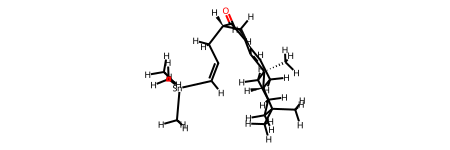

In [10]:
data = dataset[0]
print(data['rct_idx'])
atoms = data['atoms']
atoms = [pt.GetElementSymbol(a) for a in atoms]
coord = data['inpt_orien']
modes = data['modes']
freqs = data['freqs']
symbol_pos_to_xyz_file(atoms,coord,'tmp.xyz')
MolFormatConversion("tmp.xyz","tmp.sdf")
graph_ = Chem.MolFromMolFile('tmp.sdf',removeHs=False, sanitize=False)
Chem.rdmolops.AssignStereochemistryFrom3D(graph_)

molgraph_,molgraph_split_idx,molgraph_split = get_split_mol_idx(graph_,[[34,56]])       # The reactive sites is determined jointly by manual annotation and algorithmic analysis.
molgraph_

**Note:** We only use the 2D information in the molecular graph as the input for the model.